# Testes replicáveis, estratificação e lendo dados da internet

In [2]:
import pandas as pd

In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)

In [4]:
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [5]:
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

In [6]:
x = dados[["principal", "como_funciona", "contato"]]
y = dados ["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [7]:
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [8]:
dados.shape

(99, 4)

In [9]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x [75:]
teste_y = y[75:]

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previssoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previssoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

ModuleNotFoundError: No module named 'sklearn'

## Usando a biblioteca para separar o treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previssoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previssoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

*   **O treino não ta proporcional ao teste, na qual o treino tá com a proporção de a cada quase 2 pessoas que não compraram 1 comprou e o teste está a a cada 3 pessoas que não compraram 1 comprou.**


In [ ]:
treino_y.value_counts()

In [ ]:
teste_y.value_counts()

*   **O treino esta proporcional ao teste. Na qual tanto o treino quanto o teste a proporção esta quase a cada 2 que não compra 1 compra**
- Utilizando o stratify

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previssoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previssoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

In [ ]:
treino_y.value_counts()

In [ ]:
teste_y.value_counts()


# Um projeto de baixa dimensionalidade e o baseline

In [34]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [35]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [36]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

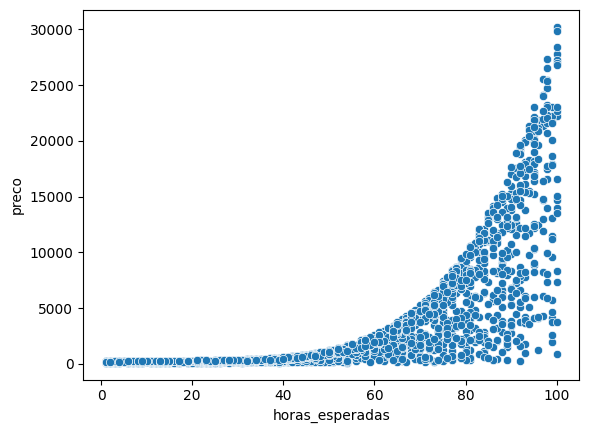

In [37]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

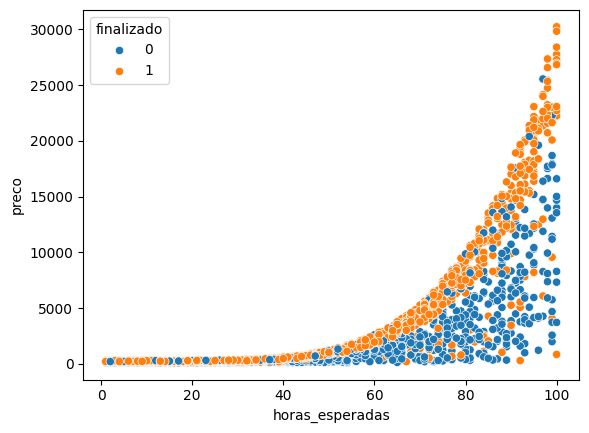

In [38]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

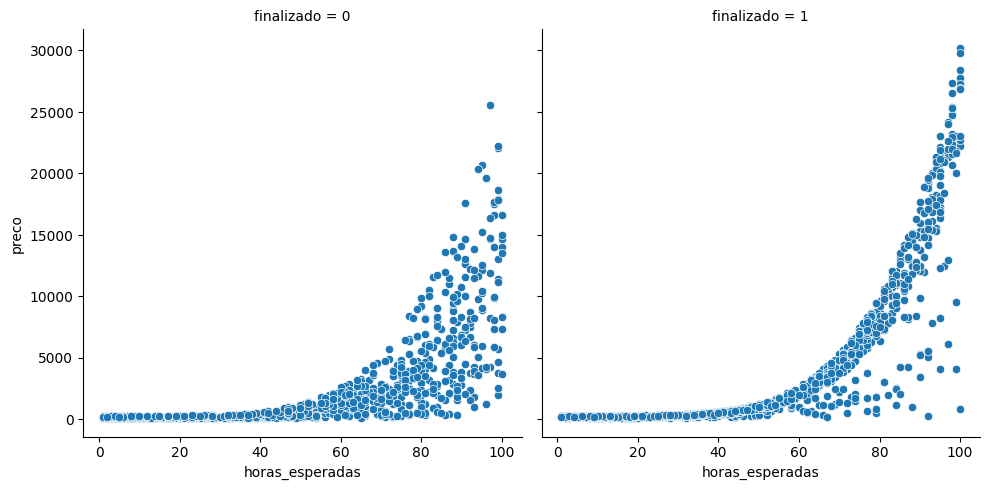

In [39]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

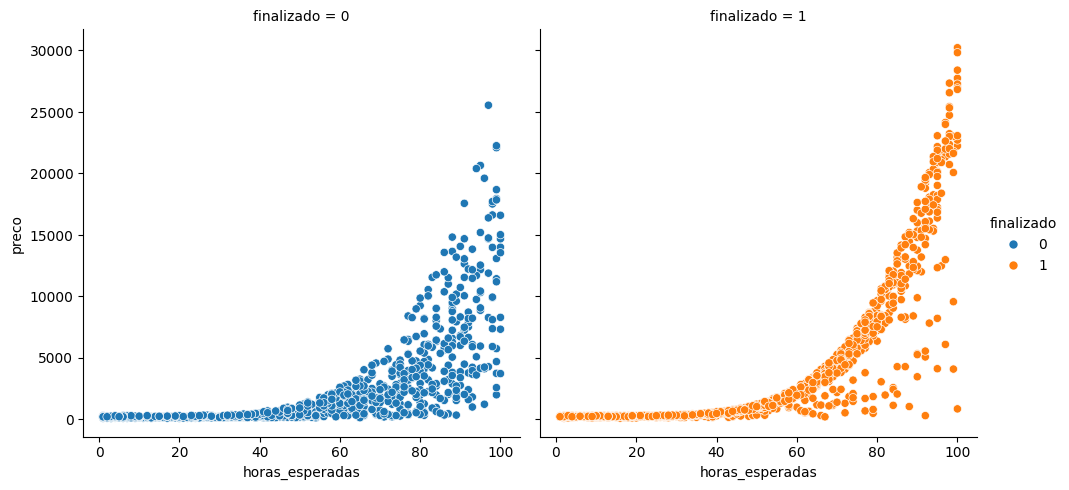

In [40]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [41]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 1


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previssoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previssoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 53.52%


In [43]:
import numpy as np

previssoes_de_base = np.ones(540)
previssoes_de_base

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [44]:
acuracia = accuracy_score(teste_y, previssoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

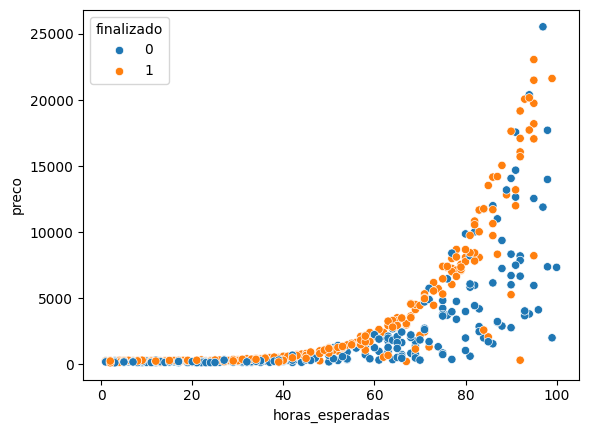

In [45]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [46]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 25545


In [47]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [48]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [49]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

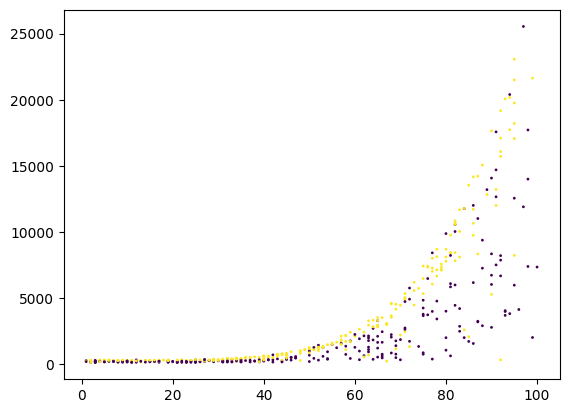

In [50]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


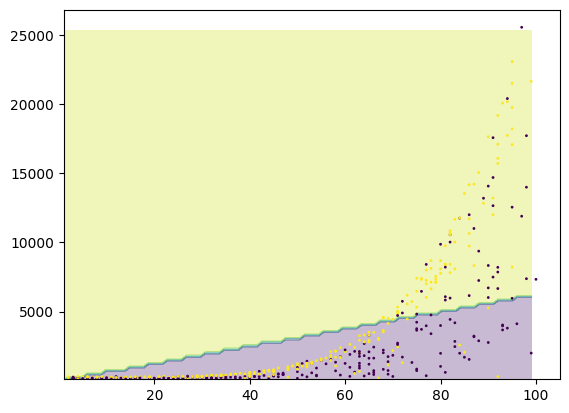

In [51]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

#Decision boundary